In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Conv1D, Flatten

2024-11-03 16:28:09.574803: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
data = pd.read_pickle('../data/data.pkl') 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17520 entries, 2022-01-01 01:00:00 to 2024-01-01 00:00:00
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   solar          17520 non-null  int64  
 1   wind_offshore  17520 non-null  int64  
 2   wind_onshore   17520 non-null  int64  
 3   total_load     17520 non-null  int64  
 4   price          17520 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 821.2 KB


In [6]:
def train_test_split(data):
    test_indices = data.index.to_series().groupby([data.index.year, data.index.month]).apply(lambda x: x[-24*7:])
    test_data = data.loc[test_indices]
    train_data = data.drop(test_indices)
    return train_data, test_data

# Perform the train-test split
# train_data, test_data = train_test_split(data)

### stationary data

In [7]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Load your dataset
# data = pd.read_csv('your_data.csv', parse_dates=['date'], index_col='date')

# Function to perform ADF test
def adf_test(series, significance_level=0.05):
    result = adfuller(series)
    adf_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]

    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')
    for key, value in critical_values.items():
        print(f'Critical Value ({key}): {value}')

    # Determine if the series is stationary
    if p_value < significance_level:
        print("The series is stationary (reject the null hypothesis)")
    else:
        print("The series is not stationary (fail to reject the null hypothesis)")

# Perform ADF test on each feature
features = ['price', 'wind_offshore', 'wind_onshore', 'solar', 'total_load']
for feature in features:
    print(f'\nADF Test for {feature}:')
    adf_test(data[feature])



ADF Test for price:
ADF Statistic: -6.460620183316498
p-value: 1.4463287635560383e-08
Critical Value (1%): -3.4307242638530675
Critical Value (5%): -2.861705410152796
Critical Value (10%): -2.5668580435332715
The series is stationary (reject the null hypothesis)

ADF Test for wind_offshore:
ADF Statistic: -9.801104203379023
p-value: 5.991998712527095e-17
Critical Value (1%): -3.430724221017473
Critical Value (5%): -2.861705391222312
Critical Value (10%): -2.566858033456859
The series is stationary (reject the null hypothesis)

ADF Test for wind_onshore:
ADF Statistic: -10.823244970225652
p-value: 1.7833909544365218e-19
Critical Value (1%): -3.4307242638530675
Critical Value (5%): -2.861705410152796
Critical Value (10%): -2.5668580435332715
The series is stationary (reject the null hypothesis)

ADF Test for solar:
ADF Statistic: -5.545164634422045
p-value: 1.667227770657614e-06
Critical Value (1%): -3.4307242638530675
Critical Value (5%): -2.861705410152796
Critical Value (10%): -2.566

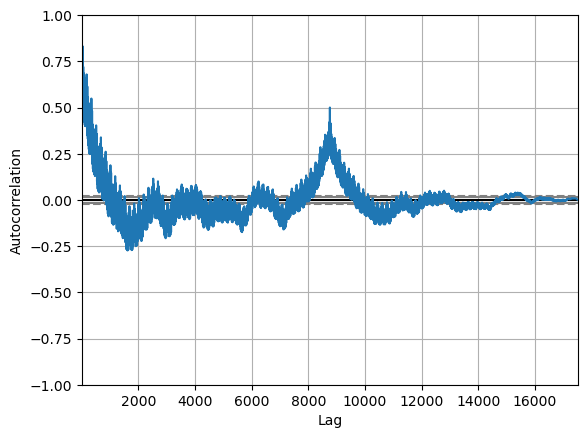

<Figure size 640x480 with 0 Axes>

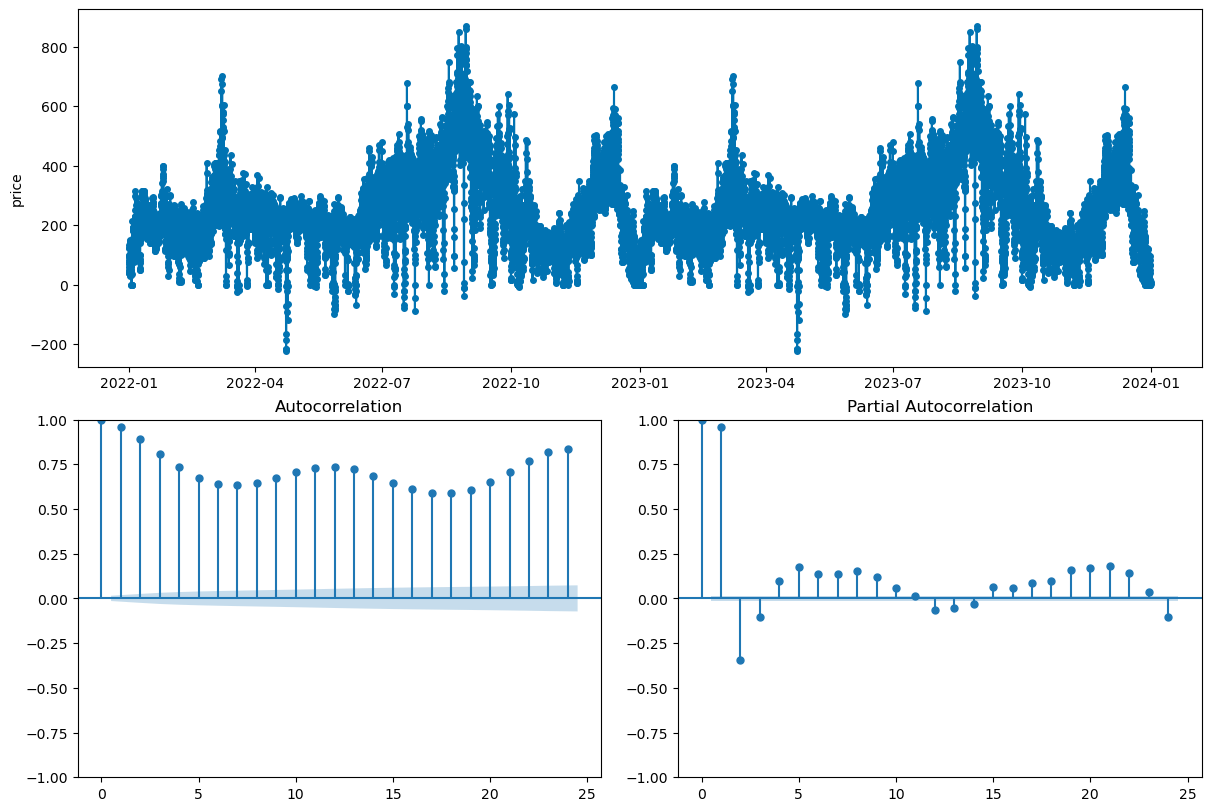

In [12]:
from scipy.fftpack import fft
from pandas.plotting import autocorrelation_plot
from sktime.utils.plotting import plot_correlations
import pandas as pd

import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
%matplotlib inline 

autocorrelation_plot(data['price'])

# use the sktime autocorrelation 
plt.figure()
fig, ax = plot_correlations(pd.Series(data['price']))  